# PCA和LDA
## 1. 生成数据

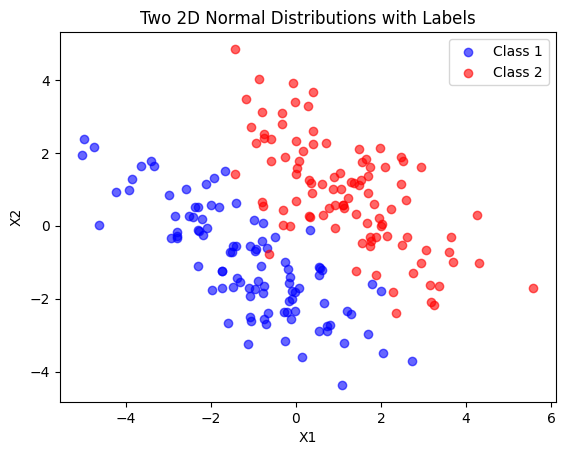

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 生成第一个二维正态分布的数据
mean1 = [-1, -1]
cov1 = [[2, -1.4], [-1.4, 2]]
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# 生成第二个二维正态分布的数据
mean2 = [1, 1]
cov2 = [[2, -1.4], [-1.4, 2]]
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 绘制散点图，给两个点群分别标记不同的颜色和标签
plt.scatter(data1[:, 0], data1[:, 1], label='Class 1', alpha=0.6, color='b')
plt.scatter(data2[:, 0], data2[:, 1], label='Class 2', alpha=0.6, color='r')

plt.title('Two 2D Normal Distributions with Labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()  
plt.show()



## 2. PCA

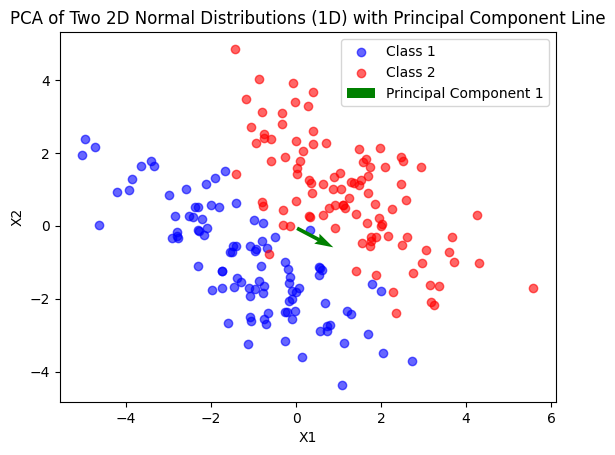

In [75]:
# 合并两个数据集
data = np.vstack((data1, data2))

# 创建PCA模型，将数据降维到1维
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data)

# 获取主成分的方向向量
principal_direction = pca.components_

# 绘制数据散点图
plt.scatter(data1[:, 0], data1[:, 1], label='Class 1', alpha=0.6, color='b')
plt.scatter(data2[:, 0], data2[:, 1], label='Class 2', alpha=0.6, color='r')

# 绘制主成分直线
plt.quiver(pca.mean_[0], pca.mean_[1], principal_direction[0, 0], principal_direction[0, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Principal Component 1')

plt.title('PCA of Two 2D Normal Distributions (1D) with Principal Component Line')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

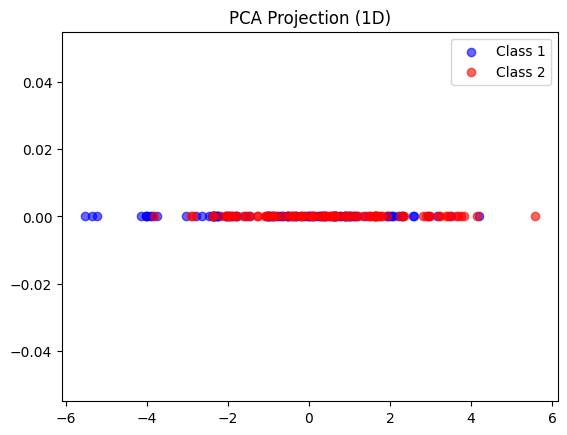

In [80]:
# 绘制PCA降维后的散点图
plt.scatter(pca_result[:100], np.zeros(100), label='Class 1', alpha=0.6, color='b')
plt.scatter(pca_result[100:], np.zeros(100), label='Class 2', alpha=0.6, color='r')

plt.title('PCA Projection (1D)')
plt.legend()  
plt.show()

## 3. LDA

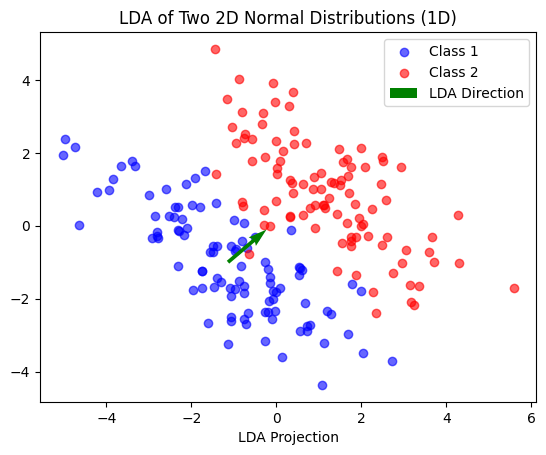

In [77]:
labels = np.hstack((np.zeros(100), np.ones(100)))

# 使用LDA进行降维
lda = LinearDiscriminantAnalysis(n_components=1)
lda_result = lda.fit_transform(data, labels)

# 获取LDA的方向向量
lda_direction = lda.scalings_.reshape(2, 1)

# 绘制数据散点图
plt.scatter(data1[:, 0], data1[:, 1], label='Class 1', alpha=0.6, color='b')
plt.scatter(data2[:, 0], data2[:, 1], label='Class 2', alpha=0.6, color='r')

# 绘制LDA方向向量
plt.quiver(lda.means_[0, 0], lda.means_[0, 1], lda_direction[0], lda_direction[1], angles='xy', scale_units='xy', scale=1, color='g', label='LDA Direction')

plt.title('LDA of Two 2D Normal Distributions (1D)')
plt.legend()
plt.show()


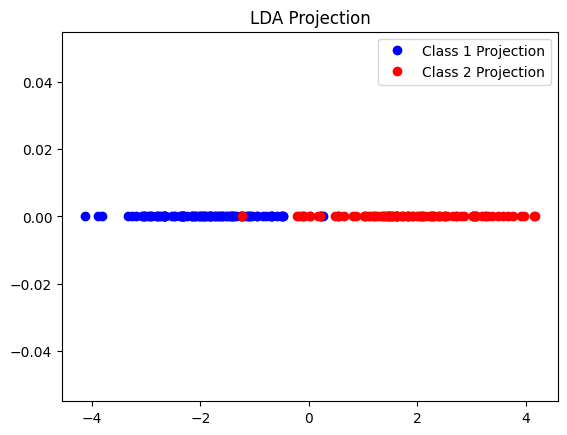

In [81]:
# 绘制LDA降维后的直线
plt.plot(lda_result[labels == 0], np.zeros(100), 'bo', label='Class 1 Projection')
plt.plot(lda_result[labels == 1], np.zeros(100), 'ro', label='Class 2 Projection')

plt.title('LDA Projection')
plt.legend()  
plt.show()